In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Data preprocessing

In [62]:
yields = pd.read_csv('SoyabeanData.csv', sep=";", header=0)
yields.head()

,DISTRICTS,YEAR,YIELD,NDVI_JUN,NDVI_JUL,NDVI_AUG,NDVI_SEP,NDVI_OCT,NDVI_NOV,LAI_JUN,...,LST_AUG,LST_SEP,LST_OCT,LST_NOV,RF_JUN,RF_JUL,RF_AUG,RF_SEP,RF_OCT,RF_NOV
0,Anuppur,2010,0.402314,0.267127,0.422869,0.549074,0.635475,0.590291,0.499968,0.476485,...,303.4592,302.5775,303.1825,302.7825,3.680000,13.399120,9.782032,8.332526,1.451772,0.177238
1,Ashoknagar,2010,1.280708,0.204788,0.442124,0.636819,0.504908,0.363624,0.374139,0.271169,...,301.6130,305.5819,309.4097,305.8609,0.799692,12.214660,8.286234,6.260466,0.267456,0.831193
2,Balaghat,2010,1.741935,0.474099,0.370348,0.622812,0.761317,0.681799,0.646178,1.010184,...,300.4666,301.0198,301.0755,300.5775,4.437671,16.387600,16.124900,12.959230,1.698881,0.560686
3,Barwani,2010,0.286952,0.245248,0.338928,0.472167,0.560045,0.451814,0.437550,0.250737,...,299.5726,305.0602,308.8047,306.8003,4.333467,7.529426,10.633870,5.368312,1.044433,1.204902
4,Betul,2010,1.095832,0.363338,0.340311,0.536145,0.647831,0.564620,0.577530,0.615970,...,301.5153,303.1102,304.5974,302.6561,4.536366,15.414000,17.074730,9.245907,1.085629,1.406991


In [63]:
yields.describe()  

,YEAR,YIELD,NDVI_JUN,NDVI_JUL,NDVI_AUG,NDVI_SEP,NDVI_OCT,NDVI_NOV,LAI_JUN,LAI_JUL,...,LST_AUG,LST_SEP,LST_OCT,LST_NOV,RF_JUN,RF_JUL,RF_AUG,RF_SEP,RF_OCT,RF_NOV
count,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,...,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000
mean,2014.500000,0.970943,0.289169,0.358941,0.538719,0.583417,0.484534,0.445450,0.430556,0.536900,...,302.131110,304.388207,307.115692,304.544305,4.282768,13.201563,11.534331,6.531961,0.893648,0.172250
std,2.875408,0.405149,0.063707,0.096858,0.077897,0.079163,0.100227,0.073495,0.190330,0.217338,...,2.552918,1.937737,3.028334,2.101414,2.869681,4.014960,4.150599,3.817987,0.933731,0.267197
min,2010.000000,0.000000,0.108369,0.104135,0.270925,0.361784,0.297160,0.280770,0.191828,0.134593,...,280.155000,298.935300,300.396300,299.498100,0.299988,4.604396,2.782477,0.768566,0.000000,0.000000
25%,2012.000000,0.661290,0.244076,0.297053,0.488871,0.532407,0.400338,0.392869,0.283626,0.377937,...,300.823025,303.003750,304.689425,303.111725,2.388944,10.314473,8.078396,4.263352,0.250863,0.004740
50%,2014.500000,0.935442,0.281703,0.359820,0.546987,0.588356,0.473149,0.435843,0.384773,0.520825,...,301.946300,304.459050,307.363050,304.629900,3.702311,12.782600,10.877090,5.650451,0.580923,0.087503
75%,2017.000000,1.272727,0.326647,0.435370,0.600105,0.637506,0.556832,0.491219,0.538415,0.659231,...,303.325625,305.613400,309.467800,305.967050,5.410815,15.501995,14.559570,7.503354,1.206442,0.237279
max,2019.000000,2.488515,0.516840,0.593550,0.686390,0.790756,0.760128,0.685336,1.283500,1.248005,...,309.247000,309.566300,313.578300,310.091900,17.556680,27.128330,23.176880,24.664330,5.698166,1.964114


In [64]:
def test(yields):
    if yields <= 0.935442:
        return 'bad'
    else:
        return 'good'

In [65]:
yields["YIELDS"] = yields['YIELD'].map(test)

In [66]:
yields["DISTRICT"] = yields["DISTRICTS"].astype('category').cat.codes
yields.head()

,DISTRICTS,YEAR,YIELD,NDVI_JUN,NDVI_JUL,NDVI_AUG,NDVI_SEP,NDVI_OCT,NDVI_NOV,LAI_JUN,...,LST_OCT,LST_NOV,RF_JUN,RF_JUL,RF_AUG,RF_SEP,RF_OCT,RF_NOV,YIELDS,DISTRICT
0,Anuppur,2010,0.402314,0.267127,0.422869,0.549074,0.635475,0.590291,0.499968,0.476485,...,303.1825,302.7825,3.680000,13.399120,9.782032,8.332526,1.451772,0.177238,bad,0
1,Ashoknagar,2010,1.280708,0.204788,0.442124,0.636819,0.504908,0.363624,0.374139,0.271169,...,309.4097,305.8609,0.799692,12.214660,8.286234,6.260466,0.267456,0.831193,good,1
2,Balaghat,2010,1.741935,0.474099,0.370348,0.622812,0.761317,0.681799,0.646178,1.010184,...,301.0755,300.5775,4.437671,16.387600,16.124900,12.959230,1.698881,0.560686,good,2
3,Barwani,2010,0.286952,0.245248,0.338928,0.472167,0.560045,0.451814,0.437550,0.250737,...,308.8047,306.8003,4.333467,7.529426,10.633870,5.368312,1.044433,1.204902,bad,3
4,Betul,2010,1.095832,0.363338,0.340311,0.536145,0.647831,0.564620,0.577530,0.615970,...,304.5974,302.6561,4.536366,15.414000,17.074730,9.245907,1.085629,1.406991,good,4


In [67]:
y = yields[["YIELDS"]]     
X = yields[['RF_AUG', "ET_OCT", 'RF_JUN','ET_JUL', "ET_NOV", "RF_SEP", "ET_SEP"]]
X.head()

,RF_AUG,ET_OCT,RF_JUN,ET_JUL,ET_NOV,RF_SEP,ET_SEP
0,9.782032,21.57419,3.680000,14.637270,15.75475,8.332526,28.39153
1,8.286234,12.30021,0.799692,9.700475,10.64300,6.260466,21.71284
2,16.124900,25.43875,4.437671,18.696250,19.99402,12.959230,35.16542
3,10.633870,14.15041,4.333467,17.638150,12.28831,5.368312,21.92284
4,17.074730,19.03496,4.536366,17.616220,16.65617,9.245907,27.68105


# Machine learning

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10) 
print('Test set', X_test.shape)
print('Train set', X_train.shape)

Test set (46, 7)
Train set (414, 7)


In [69]:
model = KNeighborsClassifier()

In [70]:
model.fit(X_train, y_train.values.ravel())    

KNeighborsClassifier()

In [72]:
print ('accuracy :', model.score(X_test, y_test), '%')

accuracy : 0.6739130434782609 %


In [73]:
cross_val_score(KNeighborsClassifier(3), X_train, y_train.values.ravel(), cv=10, scoring='accuracy').mean()

0.5770034843205575

[0.56283391 0.56997677 0.57700348 0.57723577 0.58449477 0.5916957
 0.6087108  0.60150987 0.59454123 0.58966318 0.57526132 0.58722416
 0.58728223 0.58252033 0.57520325 0.58252033 0.57526132 0.56573751
 0.56817654 0.58269454 0.56335656 0.56341463 0.56823461 0.57061556
 0.57781649 0.58751452 0.58977933 0.58484321 0.58739837 0.60429733
 0.60667828 0.60923345 0.61387921 0.61149826 0.61126597 0.59186992
 0.60150987 0.6087108  0.60882695 0.59698026 0.60174216 0.60656214
 0.60423926 0.60406504 0.60662021 0.59698026 0.60911731 0.5945993
 0.6018583  0.59454123 0.60673635 0.59703833 0.60679443 0.60905923
 0.60197445 0.59221835 0.60191638 0.5970964  0.60191638 0.59216028
 0.6043554  0.59698026 0.59936121 0.59703833 0.60423926 0.59698026
 0.60429733 0.59947735 0.59936121 0.59703833 0.5945993  0.5970964
 0.59953542 0.5898374  0.59227642 0.5898374  0.59216028 0.58490128
 0.5898374 ]


0.6138792102206735

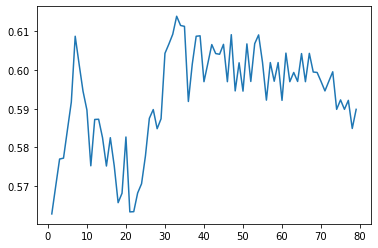

In [75]:
k = np.arange(1, 80)

train_score, val_score = validation_curve(model, X_train, y_train.values.ravel(), param_name="n_neighbors", param_range=k, cv=10)

plt.plot(k,val_score.mean(axis=1))

print(val_score.mean(axis=1))

val_score.mean(axis=1).max()



In [77]:
param_grid = {'n_neighbors': np.arange(1,20), 'metric':['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10)

grid.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [78]:
grid.best_score_

0.6235191637630663

In [79]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 7}

In [80]:
model_best = grid.best_estimator_

In [81]:
model_best.score(X_test, y_test)

0.717391304347826

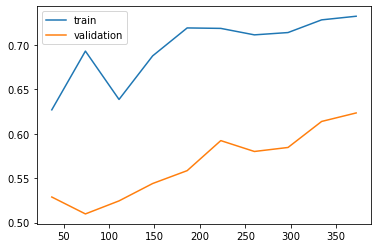

In [82]:
N, train_score, val_score = learning_curve(model_best, X_train, y_train.values.ravel(), train_sizes = np.linspace(0.1, 1.0, 10), cv=10)  

plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.legend()